In [1]:
from summer.utils import ref_times_to_dti
from autumn.tools.project import get_project, load_timeseries, build_rel_path

In [2]:
from autumn.projects.sm_sir.bangladesh.bangladesh import project

In [3]:
def convert_ts_index_to_date(ts):
    ts.index = ref_times_to_dti(project.BASE_DATE, ts.index)
    return ts
def convert_ts_set_to_date(ts_set):
    return {k: convert_ts_index_to_date(v) for k, v in ts_set.items()}

In [4]:
p = get_project("sm_sir", "bangladesh", reload=True)

In [5]:
ts_set_dates = convert_ts_set_to_date(project.ts_set)

In [6]:
results = p.run_baseline_model(project.param_set.baseline)

<AxesSubplot:>

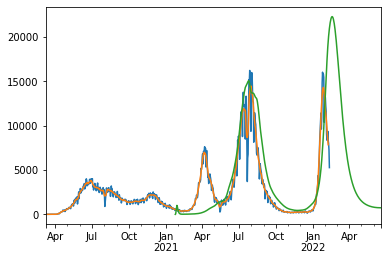

In [7]:
ts_set_dates["notifications"].plot()
ts_set_dates["notif_smooth"].plot()
derived_outputs = results.get_derived_outputs_df()
derived_outputs["notif_change"].plot()